## 1. Consider the integral
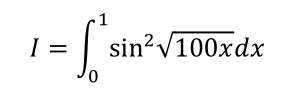

### (a)Trapezoidal rule method

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def f(x):
    return np.sin(np.sqrt(100*x))**2
def f_deriv(x):
    if x == 0:
        return 100
    else:
        return np.sin(2*np.sqrt(100*x))*5/np.sqrt(x)

In [3]:
## N: the number of slices
a = 0
b = 1
N_list = [2**i for i in range(15)]
I_list = []
𝜖_list = []
for N in N_list:
    h = (b-a)/N ## the width of each slide
    I = 0
    
    for k in range(1,N+1):
        Ak = h/2*(f(a+(k-1)*h)+f(a+k*h))
        I+=Ak
    I_list.append(I)
    if len(I_list)>=2:
        𝜖 = abs((I_list[-1]-I_list[-2])/3)
        𝜖_list.append(𝜖)

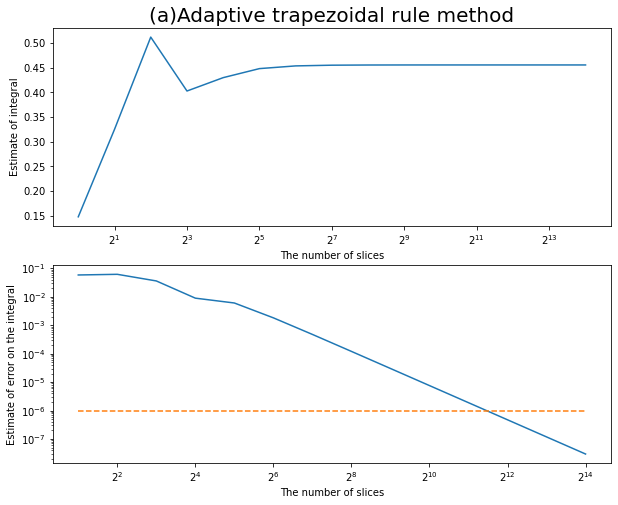

In [4]:
fig,ax = plt.subplots(2,1,figsize = (10,8))
ax[0].plot(N_list,I_list)
ax[0].set_xscale('log', base=2)
ax[0].set_xlabel("The number of slices")
ax[0].set_ylabel("Estimate of integral")

ax[1].plot(N_list[1:],𝜖_list)
ax[1].plot(N_list[1:],[10**(-6)]*14,linestyle="dashed")
ax[1].set_xscale('log', base=2)
ax[1].set_yscale('log', base=10)
ax[1].set_xlabel("The number of slices")
ax[1].set_ylabel("Estimate of error on the integral")
ax[0].set_title("(a)Adaptive trapezoidal rule method",size = 20)
plt.show()

**From the plot, we can find that when the number of slices $N = 2^{12}$, we can get an approximate accuracy of $\epsilon = 10^{-6}$ by trapezoidal rule method.**

### (b)Simpson's rule method

In [5]:
N_list = [2**i for i in range(1,15)]
I_list = []
𝜖_list = []
for N in N_list:
    h = (b-a)/N ## the width of each slide
    I = 0
    k1 = np.array([2*k-1 for k in range(1,N//2+1)])
    k2 = np.array([2*k for k in range(1,N//2)])
    I = h/3*(f(a)+f(b)+sum(4*f(a+k1*h))+sum(2*f(a+k2*h)))
    I_list.append(I)
    if len(I_list)>=2:
        𝜖 = abs((I_list[-1]-I_list[-2])/15)
        𝜖_list.append(𝜖)

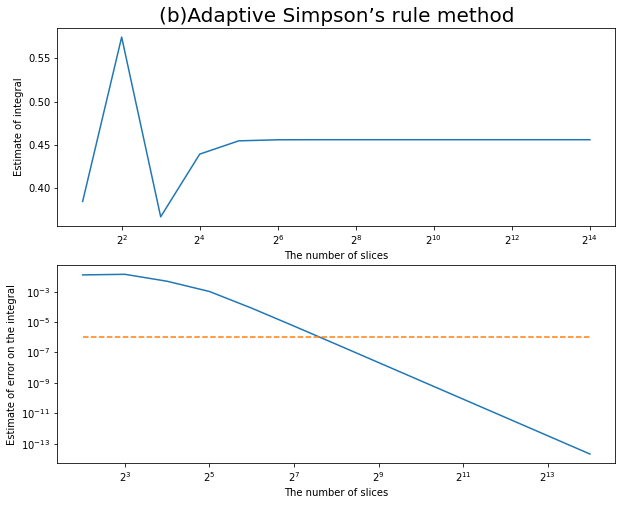

In [6]:
fig,ax = plt.subplots(2,1,figsize = (10,8))
ax[0].plot(N_list,I_list)
ax[0].set_xscale('log', base=2)
ax[0].set_xlabel("The number of slices")
ax[0].set_ylabel("Estimate of integral")

ax[1].plot(N_list[1:],𝜖_list)
ax[1].plot(N_list[1:],[10**(-6)]*13,linestyle="dashed")
ax[1].set_xscale('log', base=2)
ax[1].set_yscale('log', base=10)
ax[1].set_xlabel("The number of slices")
ax[1].set_ylabel("Estimate of error on the integral")
ax[0].set_title("(b)Adaptive Simpson’s rule method",size = 20)
plt.show()

**From the plot, we can find that when the number of slices $N=2^{8}$, we can get an approximate accuracy of $\epsilon = 10^{-6}$ by Simpson's rule method. So, the efficiency of this rule is much higher than that of part(a)**

### (c)Romberg integration technique

In [7]:
N_list = [2**i for i in range(7)]
I_list = []
𝜖_list = []
R_list = []
for i in range(len(N_list)):
    N = N_list[i]
    h = (b-a)/N ## the width of each slide
    I = 0
    R = []
    for k in range(1,N+1):
        Ak = h/2*(f(a+(k-1)*h)+f(a+k*h))
        I+=Ak
    I_list.append(I)
    R.append(I)
    if i+1>=2:
        for m in range(i):
            R.append(R[-1]+(R[-1]-R_list[-1][m])/(4**(m+1)-1))
            
        𝜖 = abs((R_list[-1][-1]-R[-2])/(4**i-1))
        𝜖_list.append(𝜖)
    R_list.append(R)

In [8]:
print("Triangular table of values:\n")
for i in range(len(R_list)):
    print(i+1,":",np.round(R_list[i],7))

Triangular table of values:

1 : [0.1479795]
2 : [0.3252319 0.384316 ]
3 : [0.5122829 0.5746332 0.587321 ]
4 : [0.4029974 0.366569  0.352698  0.3489739]
5 : [0.4301034 0.4391387 0.4439767 0.4454255 0.4458038]
6 : [0.4484147 0.4545184 0.4555437 0.4557274 0.4557678 0.4557775]
7 : [0.4539129 0.4557457 0.4558275 0.455832  0.4558324 0.4558325 0.4558325]


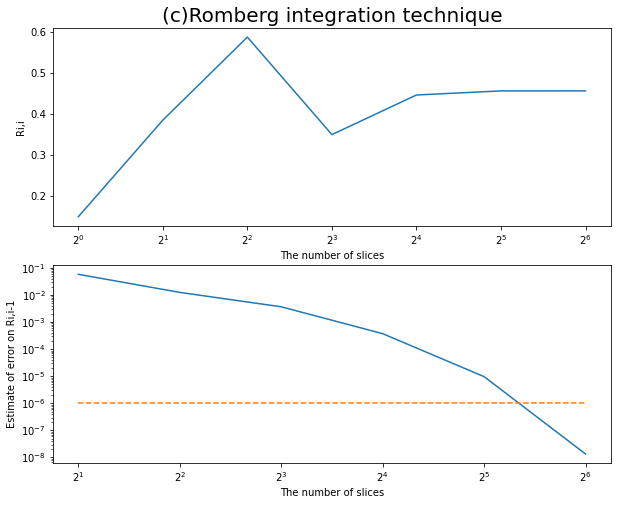

In [9]:
fig,ax = plt.subplots(2,1,figsize = (10,8))
ax[0].plot(N_list,[R_list[i][-1] for i in range(len(R_list)) ])
ax[0].set_xscale('log', base=2)
ax[0].set_xlabel("The number of slices")
ax[0].set_ylabel("Ri,i")

ax[1].plot(N_list[1:],𝜖_list)
ax[1].plot(N_list[1:],[10**(-6)]*6,linestyle="dashed")
ax[1].set_xscale('log', base=2)
ax[1].set_yscale('log', base=10)
ax[1].set_xlabel("The number of slices")
ax[1].set_ylabel("Estimate of error on Ri,i-1")
ax[0].set_title("(c)Romberg integration technique",size = 20)
plt.show()

**From the plot, we can find that when the number of slices $N=2^{6}$, we can get an approximate accuracy of $\epsilon = 10^{-6}$ by Romberg integration technique. So, the efficiency of this rule is much higher than that of part(a) and part(b)**

## 2.  The heat capacity of a solid at temperature T under Debye's theory
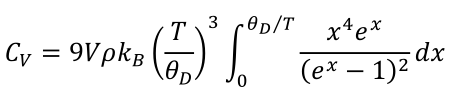

### (a)Gaussian quadrature to calculate dimensionless heat capacity

In [16]:
from gaussxw import gaussxw

In [11]:
def f(x):
    return x**4*np.exp(x)/(np.exp(x)-1)**2

In [37]:
## Function that calculates dimensionless temperature for a given value of dimensionless T
def dimless_heat_capa(N,dimless_T):
    a = 0
    b = 1/dimless_T
    x,w = gaussxw(N)
    xp = 0.5*(b-a)*x+0.5*(b+a)
    wp = 0.5*(b-a)*w
    s = 0.0
    for k in range(N):
        s+=wp[k]*f(xp[k])
    s*=dimless_T**3
    return s

In [38]:
dimless_T = 1
N = 3
print("when the dimensionless T =",dimless_T,", dimensionless heat capacity =",
      dimless_heat_capa(N,dimless_T))

when the dimensionless T = 1 , dimensionless heat capacity = 0.31724296033906535


### (b)The heat capacity of a sample consisting of $1000$ cubic centimeters of solid aluminum, which has a number density of $\rho= 6.022 × 10^{28}m^{−3}$ and a Debye temperature of $\theta_{D} = 428 K$.

In [47]:
import scipy.constants as sc

In [57]:
V = 1000e-6
rho = 6.022e28
theta_D = 428
k_B = sc.k

In [58]:
T = np.arange(5,501)
dimless_T = T/theta_D
N = 50

In [59]:
C_V = 9*V*rho*k_B*np.array([dimless_heat_capa(N,dimless_T[i]) for i in range(len(T))])

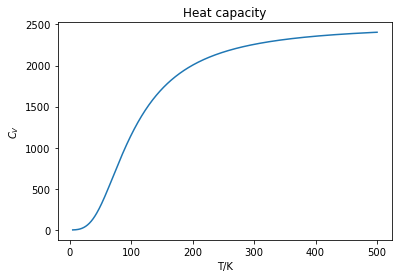

In [64]:
plt.plot(T,C_V)
plt.xlabel("T/K")
plt.ylabel("$C_{V}$")
plt.title("Heat capacity")
plt.show()

## 3. The volume of a sphere of unit radius in ten dimensions using a Monte Carlo method.

$$
I \approx V<f>
$$

$$
<f> = \frac{1}{N} \displaystyle \sum^{N}_{i=1}f(\overrightarrow{x_{i}})
$$

$$
V = 2^{d}
$$
**where $d$ is the dimension of the sphere**

In [102]:
from numpy import linalg as la 

In [103]:
def f(x):
    if la.norm(x,2)<=1:
        return 1
    else:
        return 0

In [140]:
N = int(1e6)
dim = 10
V = 2**dim
su = 0
for i in range(N):
    point = np.random.uniform(-1,1,dim)
    su+=f(point)

In [143]:
I = su*V/N
print("Using a Monte Carlo method, we get the volume of a sphere of unit radius in ten dimensions to be",
     I)

Using a Monte Carlo method, we get the volume of a sphere of unit radius in ten dimensions to be 2.576384


## 4. Consider the integral
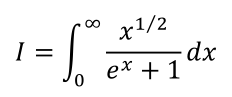

### (a)Set the artificial cutoff of the upper limit at $x = 10$ and evaluate the integral
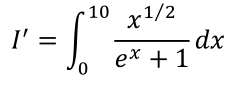

In [144]:
def f(x):
    return np.sqrt(x)/(np.exp(x)+1)

In [149]:
M1 = 0
M2 = 0
N = 1000000
V = 10
for i in range(N):
    x = np.random.uniform(0,V)
    M1+=f(x)
    M2+=f(x)**2
M1 = M1/N
M2 = M2/N
I_10 = V*M1
I_10_error = V*np.sqrt((M2-M1**2)/(N-1))

In [153]:
print("We evaluate the integral to be",I_10)
print("The error estimation is",I_10_error)

We evaluate the integral to be 0.6785907312603132
The error estimation is 0.0009134441153370689


### (b) State two shortcomings of the above direct simple Monte Carlo method.

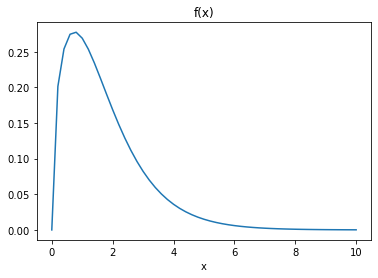

In [155]:
a = np.arange(0,10.2,0.2)
b = f(a)
plt.plot(a,b)
plt.title("f(x)")
plt.xlabel("x")
plt.show()

$Shortcomings$<br>
**(1)When directly using Monte Carlo method, the larger the variation in $f$, the larger the error term is. Since the variation in f(x) is quite large according to the plot above, the error of this method is also large**<br>
**(2)It needs to first set the artifical cutoff of the upper limit**

### (c)Evaluate the integral by sampling points with weight function
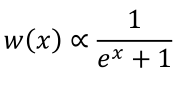

In [162]:
def f_w(s):
    a = 1/(2*np.exp(-s)-1)
    return np.sqrt(np.log(a))

In [163]:
M1 = 0
M2 = 0
N = 1000000
V = np.log(2)
for i in range(N):
    s = np.random.uniform(0,V)
    M1+=f_w(s)
    M2+=f_w(s)**2
M1 = M1/N
M2 = M2/N
I_w = V*M1
I_w_error = V*np.sqrt((M2-M1**2)/(N-1))

In [166]:
print("After sampling points with weight function, we evaluate the integral to be",I_w)
print("The error estimation is",I_w_error)

After sampling points with weight function, we evaluate the integral to be 0.6779181006433699
The error estimation is 0.00033206352806358354


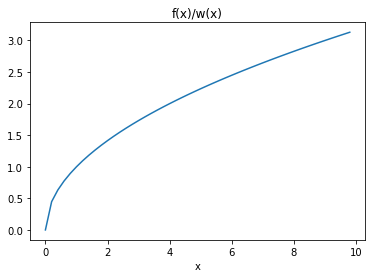

In [176]:
a = np.arange(0,10,0.2)
b = np.sqrt(a)
plt.plot(a,b)
plt.title("f(x)/w(x)")
plt.xlabel("x")
plt.show()

**Compared with the results in (a), we get more accurate results using the transformation method. This is because the variation of function $f/w$ is smaller than that of $f$**

### (d)Metropolis Algorithm

$$
P(x^{k}\rightarrow x^{k+1})=R(x^{k}\rightarrow x^{k+1})A(x^{k}\rightarrow x^{k+1})
$$
<br>
$$
R(x^{k}\rightarrow x^{k+1})=\begin{cases}
1, & \mid x^{k}-x^{k+1}\mid \leq \eta\\
0, & otherwise
\end{cases}
$$
<br>
$$
A(x^{k}\rightarrow x^{k+1})=min[1,\frac{w(y)}{w(x)}]
$$


**Here we choose $\eta=1$**

In [275]:
def w(x):
    return 1/(1+np.exp(x))/np.log(2)
def f(x):
    return np.sqrt(x)*np.log(2)

In [276]:
eta = 0.1
N = 1000000

To reduce the calculation time, we only consider one particle's move. To make sure it is up to be steady, we only choose the $N$ points after $N$ times of move. 

In [277]:
track = [100]
for k in range(2*N):
    x_k = track[-1]
    x_k_1 = np.random.uniform(max(0,x_k-eta),x_k+eta)
    A = min(1,w(x_k_1)/w(x_k))
    P = 1*A
    if np.random.uniform(0,1)<=P:
        track.append(x_k_1)

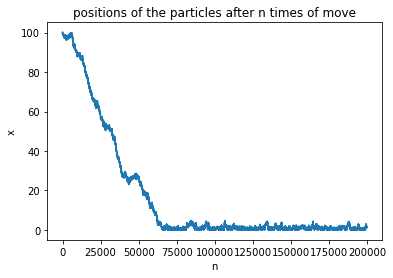

In [278]:
plt.plot(np.arange(200000),track[:200000])
plt.title("positions of the particles after n times of move")
plt.xlabel("n")
plt.ylabel("x")
plt.show()

In [282]:
print("From the graph above, we can find that the particle is steady after 60000 times of move")

From the graph above, we can find that the particle is steady after 60000 times of move


In [280]:
M1 = np.mean(f(track[-N:]))
M2 = np.mean(f(track[-N:])**2)
I_metro = M1
I_metro_error = np.sqrt((M2-M1**2)/(N-1))

In [284]:
print("After sampling points with weight function, we evaluate the integral to be",I_metro)
print("The error estimation is",I_metro_error)

After sampling points with weight function, we evaluate the integral to be 0.6781930295484988
The error estimation is 0.00031765925830573


**Compared with the results in (a) and (c), the error is similar to (c) but smaller than (a)**